In [1]:
import os
from importlib.resources import files

import numpy as np
import scipy.io as sio
%matplotlib widget
import matplotlib
import matplotlib.pyplot as plt

from learn_embedding.utils.data_process import DataProcess

In [2]:
colors = ["#377eb8", "#ff7f00", "#4daf4a", "#f781bf",
          "#a65628", "#984ea3", "#999999", "#e41a1c", "#dede00", ]

names = ['Angle','BendedLine','CShape','DoubleBendedLine','GShape','heee','JShape','JShape_2','Khamesh','Leaf_1',
         'Leaf_2','Line','LShape','NShape','PShape','RShape','Saeghe','Sharpc','Sine','Snake','Spoon','Sshape',
         'Trapezoid','Worm','WShape','Zshape','Multi_Models_1','Multi_Models_2','Multi_Models_3','Multi_Models_4']

## Load Dataset

In [3]:
dataset = "JShape"
data_path = files('learn_embedding').joinpath(os.path.join('data/lasahandwriting', '{}.mat'.format(dataset)))
data = sio.loadmat(data_path)

## Extract Demonstrations
Demonstrations structure tensor[i,j,k] with i the sample number, j the dimension and k the trajectory (this assumes that all the trajectories have the same number of points).

In [4]:
dt = data["dt"]

num_dimensions = 2
num_trajectories = len(data['demos'][0])
num_samples = data['demos'][0][0]['t'][0, 0].shape[1]

time = np.zeros((num_samples, 1, num_trajectories))
pos = np.zeros((num_samples, num_dimensions, num_trajectories))
vel = np.zeros_like(pos)
acc = np.zeros_like(pos)

for i, demo in enumerate(data['demos'][0]):
    time[:,:,i] = demo['t'][0,0].T
    pos[:,:,i] = demo['pos'][0,0].T
    vel[:,:,i] = demo['vel'][0,0].T
    acc[:,:,i] = demo['acc'][0,0].T

## Raw Demonstrations

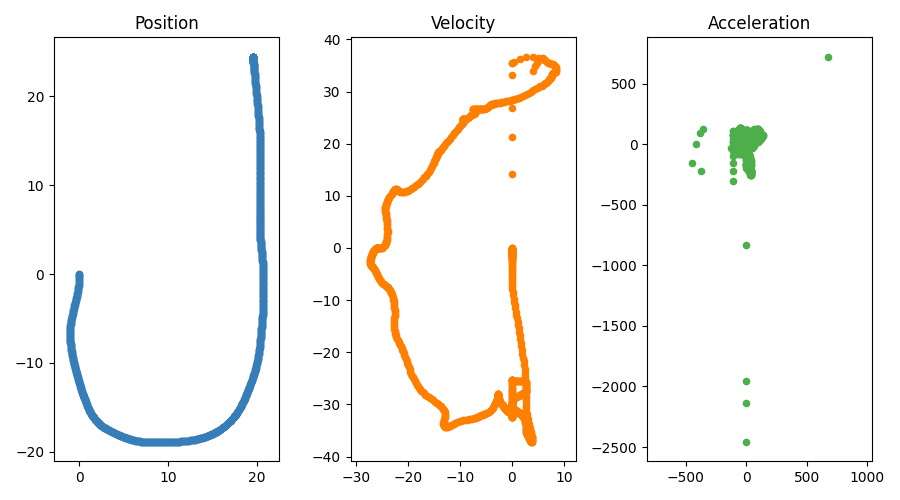

In [5]:
fig = plt.figure(figsize=(9,5))
ax = [fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133)]
ax[0].set_title('Position')
ax[1].set_title('Velocity')
ax[2].set_title('Acceleration')
for i in range(1):
    ax[0].scatter(pos[:,0,i], pos[:,1,i], s=20, c=colors[0])
    ax[1].scatter(vel[:,0,i], vel[:,1,i], s=20, c=colors[1])
    ax[2].scatter(acc[:,0,i], acc[:,1,i], s=20, c=colors[2])    
ax[0].axis('equal')
ax[1].axis('equal')
ax[2].axis('equal')
fig.tight_layout()

## Rescale

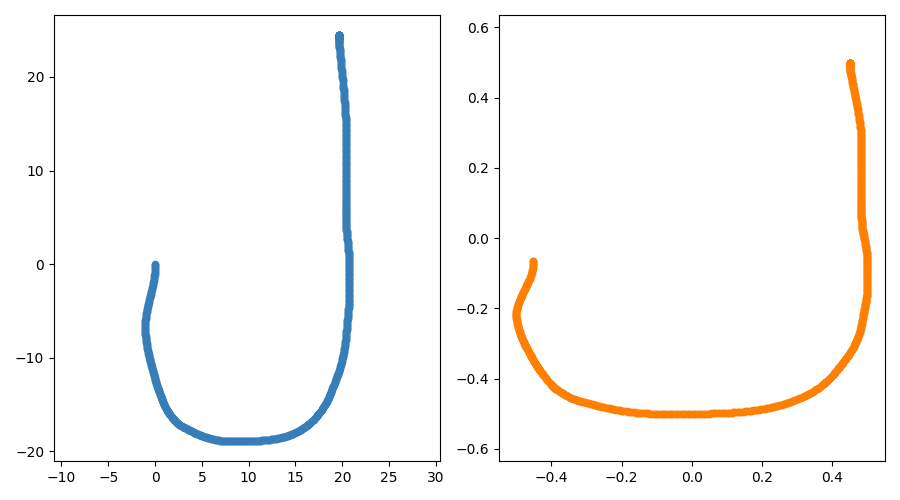

In [6]:
p1 = DataProcess.rescale(pos[:,:,0], np.array([0.5,0.5]), np.array([-0.5,-0.5]))

fig = plt.figure(figsize=(9, 5))
ax = [fig.add_subplot(121), fig.add_subplot(122)]
ax[0].scatter(pos[:,0,0], pos[:,1,0], s=20, c=colors[0])
ax[1].scatter(p1[:,0], p1[:,1], s=20, c=colors[1])
ax[0].axis('equal')
ax[1].axis('equal')
fig.tight_layout()

## Rotate

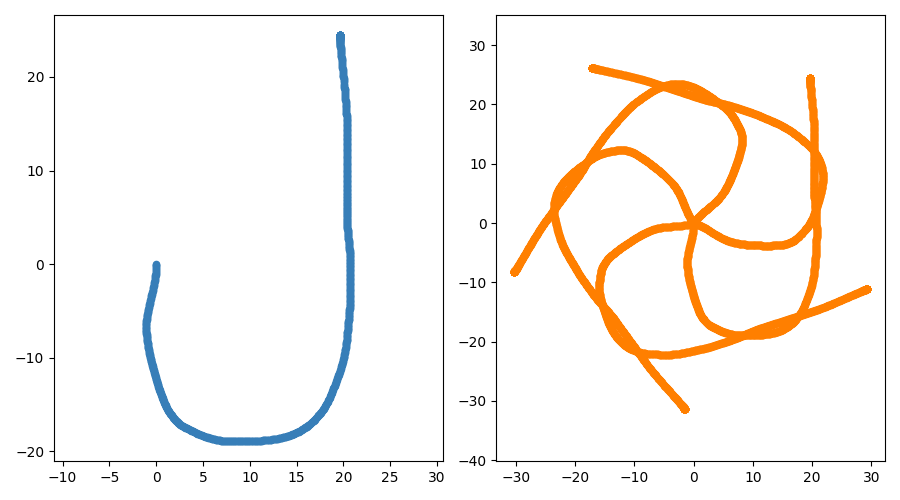

In [7]:
p2 = DataProcess.rotate(pos[:,:,0], 5)

fig = plt.figure(figsize=(9, 5))
ax = [fig.add_subplot(121), fig.add_subplot(122)]
ax[0].scatter(pos[:,0,0], pos[:,1,0], s=20, c=colors[0])
for i in range(5):
    ax[1].scatter(p2[:,0,i], p2[:,1,i], s=20, c=colors[1])
ax[0].axis('equal')
ax[1].axis('equal')
fig.tight_layout()

## Normalize

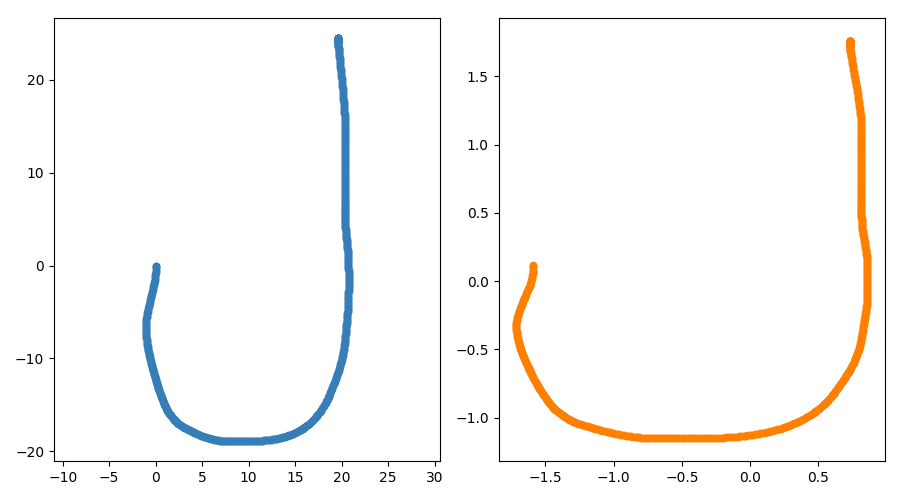

In [8]:
p3 = DataProcess.normalize(pos[:,:,0])

fig = plt.figure(figsize=(9, 5))
ax = [fig.add_subplot(121), fig.add_subplot(122)]
ax[0].scatter(pos[:,0,0], pos[:,1,0], s=20, c=colors[0])
ax[1].scatter(p3[:,0], p3[:,1], s=20, c=colors[1])
ax[0].axis('equal')
ax[1].axis('equal')
fig.tight_layout()

## Derive Velocities

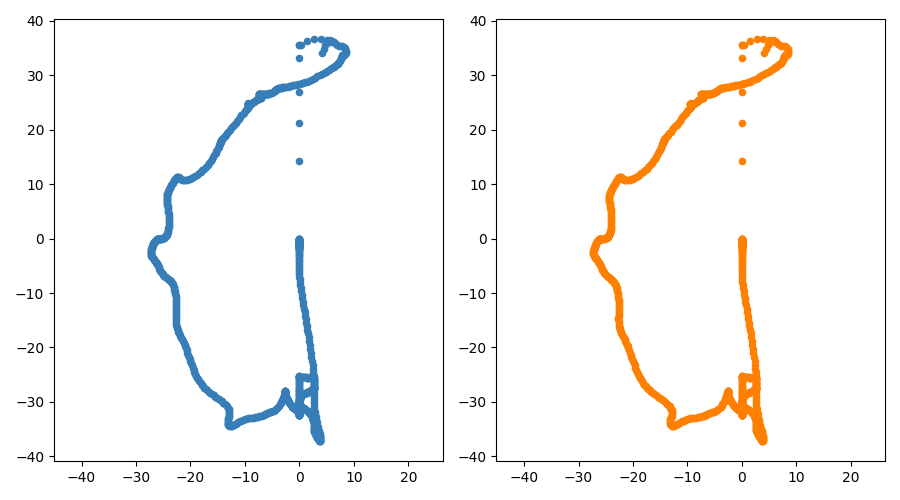

In [9]:
v = DataProcess.derive(pos[:,:,0], time[:,:,0])

fig = plt.figure(figsize=(9, 5))
ax = [fig.add_subplot(121), fig.add_subplot(122)]
ax[0].scatter(vel[:,0,0], vel[:,1,0], s=20, c=colors[0])
ax[1].scatter(v[:,0], v[:,1], s=20, c=colors[1])
ax[0].axis('equal')
ax[1].axis('equal')
fig.tight_layout()

## Derive Velocities & Accelerations

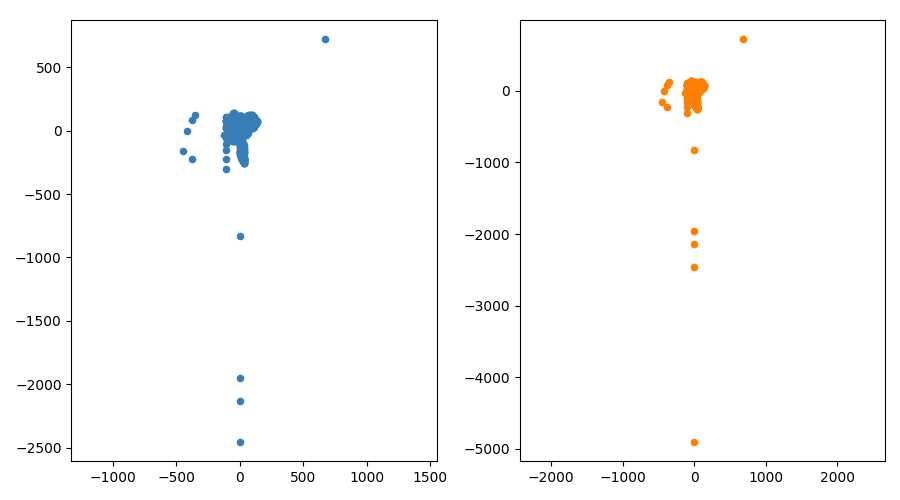

In [10]:
a = DataProcess.derive(v, time[:,:,0])

fig = plt.figure(figsize=(9, 5))
ax = [fig.add_subplot(121), fig.add_subplot(122)]
ax[0].scatter(acc[:,0,0], acc[:,1,0], s=20, c=colors[0])
ax[1].scatter(a[:,0], a[:,1], s=20, c=colors[1])
ax[0].axis('equal')
ax[1].axis('equal')
fig.tight_layout()

## Trim

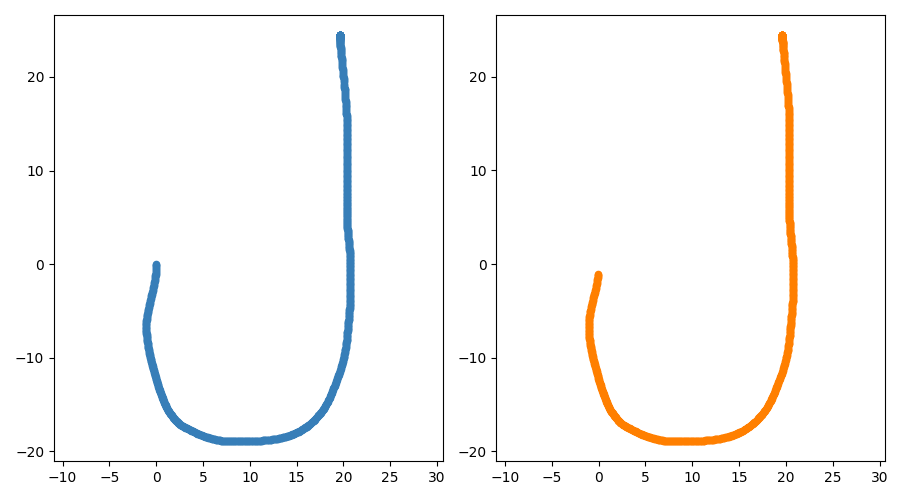

In [11]:
p4 = DataProcess.trim(pos[:,:,0], 10, 10)

fig = plt.figure(figsize=(9, 5))
ax = [fig.add_subplot(121), fig.add_subplot(122)]
ax[0].scatter(pos[:,0,0], pos[:,1,0], s=20, c=colors[0])
ax[1].scatter(p4[:,0], p4[:,1], s=20, c=colors[1])
ax[0].axis('equal')
ax[1].axis('equal')
fig.tight_layout()

## Smooth position

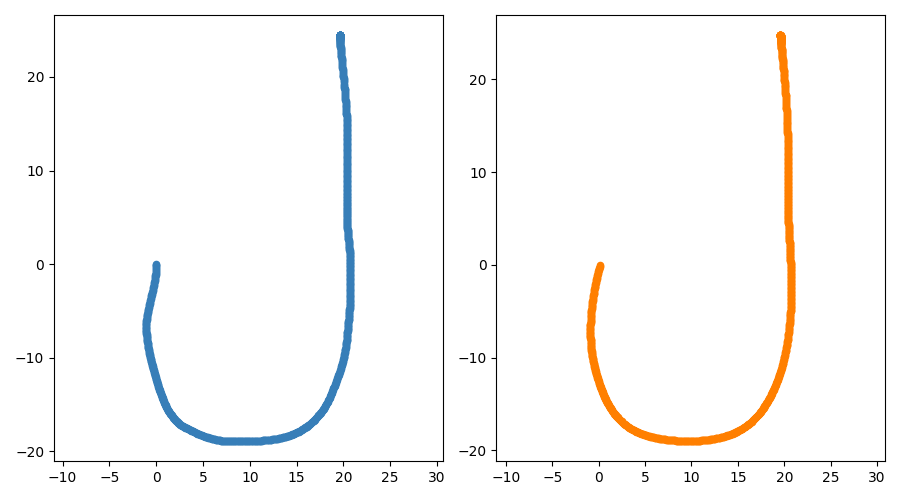

In [12]:
p5 = DataProcess.smooth(pos[:,:,0], 200, 2, mode='interp')

fig = plt.figure(figsize=(9, 5))
ax = [fig.add_subplot(121), fig.add_subplot(122)]
ax[0].scatter(pos[:,0,0], pos[:,1,0], s=20, c=colors[0])
ax[1].scatter(p5[:,0], p5[:,1], s=20, c=colors[1])
ax[0].axis('equal')
ax[1].axis('equal')
fig.tight_layout()

## Smooth velocity

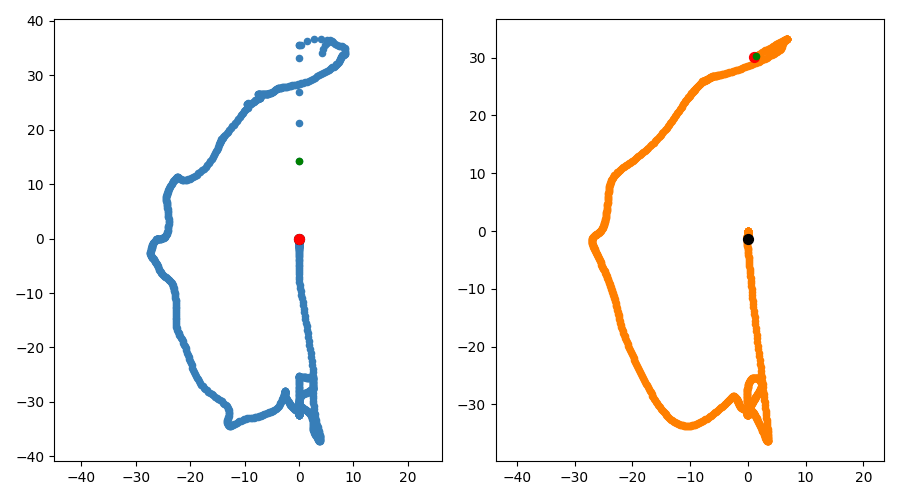

In [13]:
v5 = DataProcess.smooth(vel[:,:,0], 100, 2, mode='interp')

fig = plt.figure(figsize=(9, 5))
ax = [fig.add_subplot(121), fig.add_subplot(122)]
ax[0].scatter(vel[:,0,0], vel[:,1,0], s=20, c=colors[0])
ax[1].scatter(v5[:,0], v5[:,1], s=20, c=colors[1])

ax[0].scatter(vel[0,0,0], vel[0,1,0], s=50, c='k')
ax[0].scatter(vel[-1,0,0], vel[-1,1,0], s=50, c='r')
ax[0].scatter(vel[-2,0,0], vel[-2,1,0], s=20, c='g')

ax[1].scatter(v5[0,0], v5[0,1], s=50, c='k')
ax[1].scatter(v5[-1,0], v5[-1,1], s=50, c='r')
ax[1].scatter(v5[-2,0], v5[-2,1], s=20, c='g')

ax[0].axis('equal')
ax[1].axis('equal')
fig.tight_layout()

## Smooth acceleration

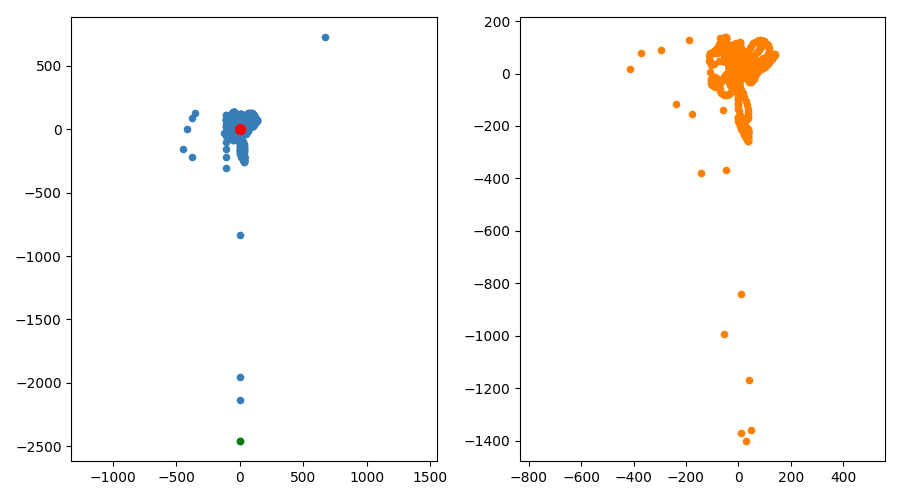

In [20]:
a5 = DataProcess.smooth(acc[:,:,0], 10, 2, mode='interp')

fig = plt.figure(figsize=(9, 5))
ax = [fig.add_subplot(121), fig.add_subplot(122)]
ax[0].scatter(acc[:,0,0], acc[:,1,0], s=20, c=colors[0])
ax[1].scatter(a5[:,0], a5[:,1], s=20, c=colors[1])

ax[0].scatter(acc[0,0,0], acc[0,1,0], s=20, c='k')
ax[0].scatter(acc[-1,0,0], acc[-1,1,0], s=50, c='r')
ax[0].scatter(acc[-2,0,0], acc[-3,1,0], s=20, c='g')

ax[0].axis('equal')
ax[1].axis('equal')
fig.tight_layout()

## Test preprocess

### Original Trajecotry

In [15]:
t = time[:,:,0]
x = pos[:,:,0]
v = vel[:,:,0]
a = acc[:,:,0]

### Trim

In [16]:
t = DataProcess.trim(t, 10, 10)
x = DataProcess.trim(x, 10, 10)
v = DataProcess.trim(v, 10, 10)
a = DataProcess.trim(a, 10, 10)

### Rescale/Normalize and Derive

In [17]:
# x = DataProcess.rescale(x, np.array([1,1]), np.array([0,0]))
# v = DataProcess.derive(x, t)
# a = DataProcess.derive(v, t)

### Smooth

In [18]:
x = DataProcess.smooth(x, 10, 2, deriv=0, delta=dt, mode='interp', cval=0.0)
v = DataProcess.smooth(x, 10, 2, deriv=1, delta=dt, mode='interp', cval=0.0)
a = DataProcess.smooth(x, 10, 2, deriv=2, delta=dt, mode='interp', cval=0.0)

(-121.08797785164639,
 106.31756240261889,
 -285.5140716197356,
 115.50489692320293)

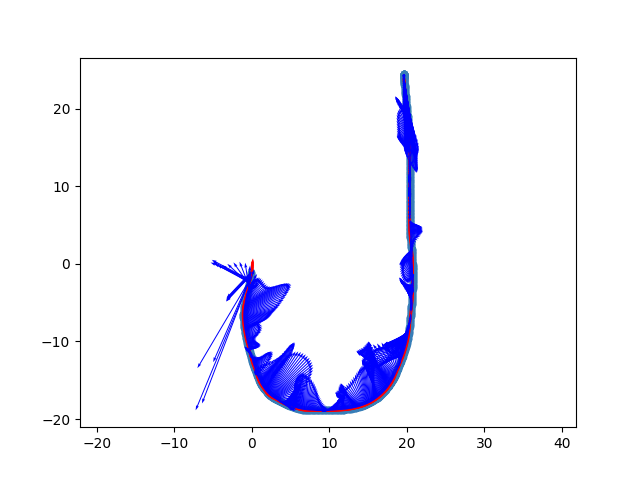

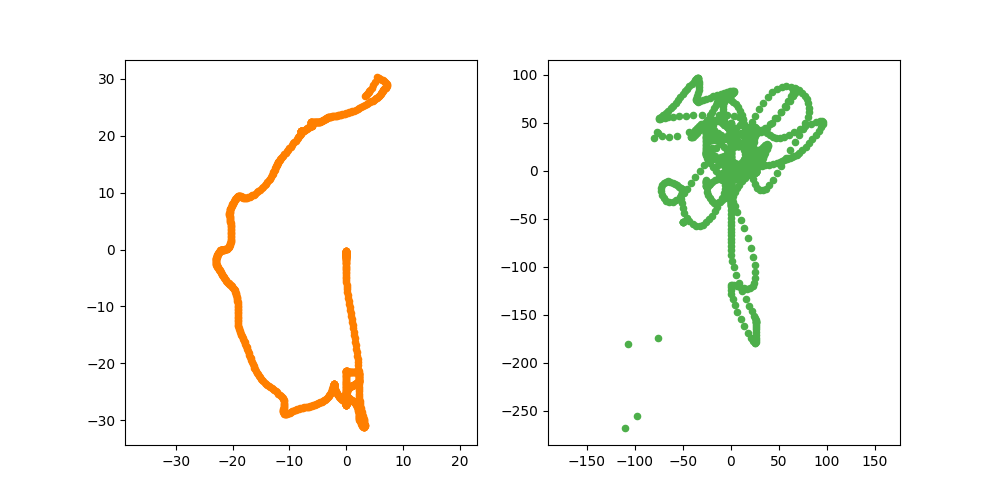

In [19]:
step = 1
scale = 1000
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x[::step,0], x[::step,1], s=20, c=colors[0])
ax.quiver(x[::step,0], x[::step,1], v[::step,0]/scale, v[::step,1]/scale, scale=1, width=0.002, color='r')
ax.quiver(x[::step,0], x[::step,1], a[::step,0]/scale, a[::step,1]/scale, scale=1, width=0.002, color='b')
ax.axis('equal')

fig = plt.figure(figsize=(10, 5))
ax = [fig.add_subplot(121), fig.add_subplot(122)]
ax[0].scatter(v[:,0], v[:,1], s=20, c=colors[1])
ax[1].scatter(a[:,0], a[:,1], s=20, c=colors[2])
ax[0].axis('equal')
ax[1].axis('equal')